In [4]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
# data

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)

C:\Users\mothe\AppData\Local\Temp\ipykernel_17704\2833057827.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  utah_counties.columns = pd.to_datetime(utah_counties.columns)


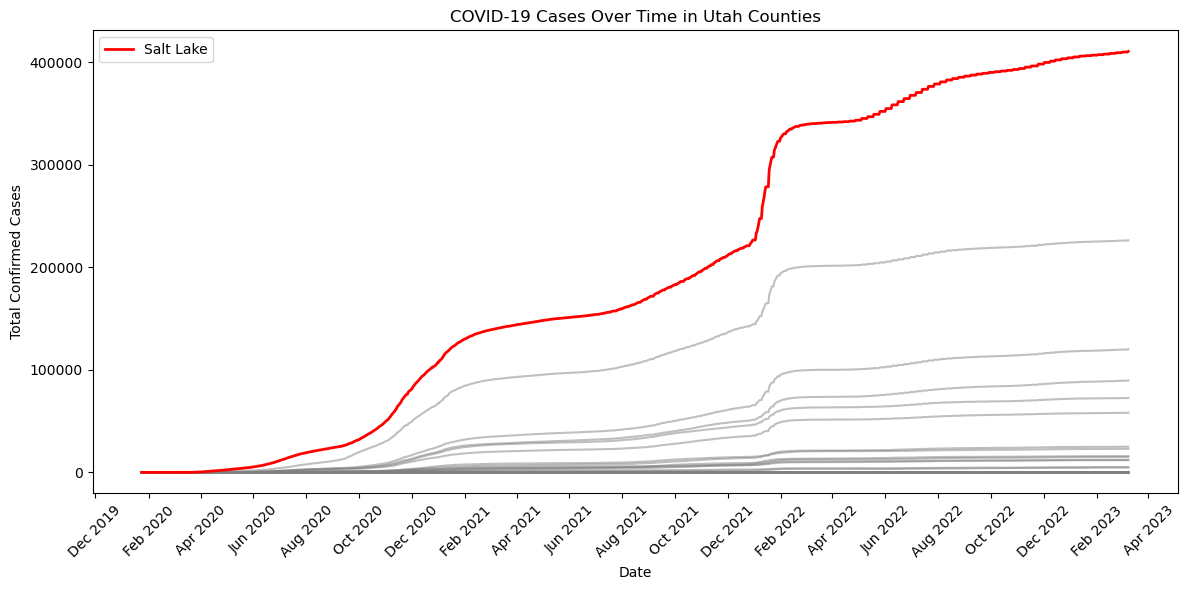

In [6]:
#QUESTION 1
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Filter data for Utah counties
utah_data = covid_df[covid_df['Province_State'] == 'Utah']

# Extract county-level data (Admin2 is the county name)
utah_counties = utah_data.set_index('Admin2').iloc[:, 11:]  # Select date columns

# Convert columns to datetime for proper formatting
utah_counties.columns = pd.to_datetime(utah_counties.columns)

# Select a specific county for emphasis (e.g., Salt Lake)
highlight_county = 'Salt Lake'
highlight_data = utah_counties.loc[highlight_county]
background_data = utah_counties.drop(index=highlight_county)

# Plot data for all counties in the background (grey lines)
plt.figure(figsize=(12, 6))
for county in background_data.index:
    plt.plot(background_data.columns, background_data.loc[county], color='grey', alpha=0.5)

# Plot the highlighted county (contrasting color, e.g., red)
plt.plot(highlight_data.index, highlight_data.values, color='red', label=highlight_county, linewidth=2)

# Formatting the X-axis for dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Month Year"
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Show every 2nd month
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.title('COVID-19 Cases Over Time in Utah Counties')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\mothe\AppData\Local\Temp\ipykernel_17704\2266348803.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  utah_county_data.index = pd.to_datetime(utah_county_data.index, errors='coerce')
C:\Users\mothe\AppData\Local\Temp\ipykernel_17704\2266348803.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  florida_county_data.index = pd.to_datetime(florida_county_data.index, errors='coerce')


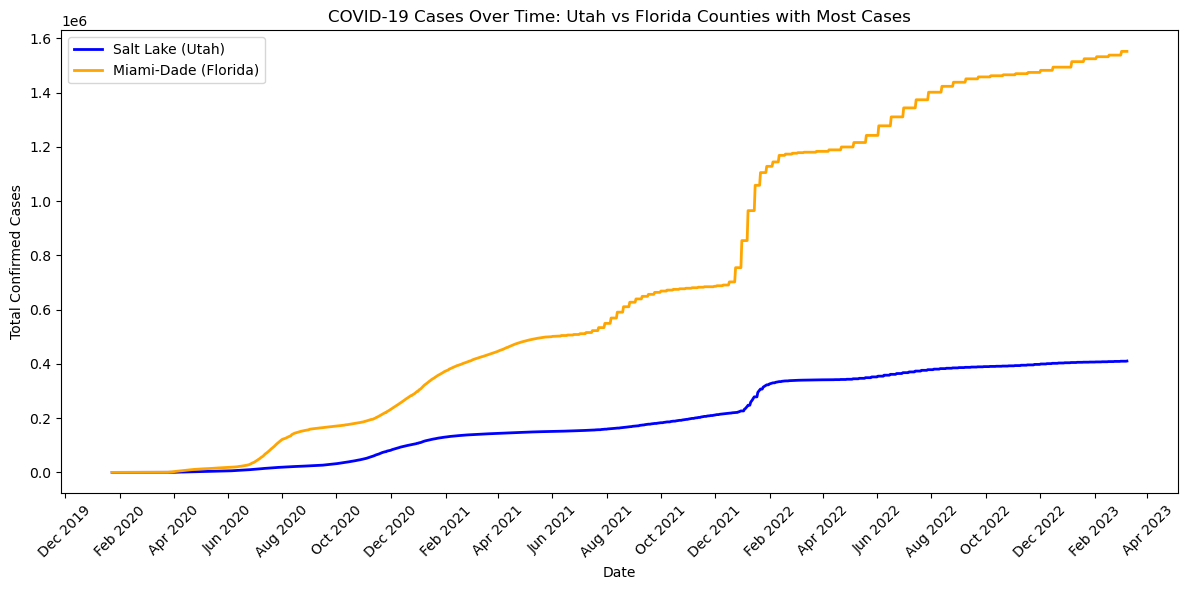

In [7]:
#QUESTION 2
import matplotlib.pyplot as plt
import pandas as pd

# Filter data for Utah and Florida
utah_data = covid_df[covid_df['Province_State'] == 'Utah']
florida_data = covid_df[covid_df['Province_State'] == 'Florida']

# Aggregate cases to date for each county and find the one with the most cases
utah_most_cases = utah_data.set_index('Admin2').iloc[:, 11:].sum(axis=1).idxmax()
florida_most_cases = florida_data.set_index('Admin2').iloc[:, 11:].sum(axis=1).idxmax()

# Extract time series data for the two counties
utah_county_data = utah_data.set_index('Admin2').loc[utah_most_cases].iloc[10:]
florida_county_data = florida_data.set_index('Admin2').loc[florida_most_cases].iloc[10:]

# Convert columns to datetime
utah_county_data.index = pd.to_datetime(utah_county_data.index, errors='coerce')
florida_county_data.index = pd.to_datetime(florida_county_data.index, errors='coerce')

# Plot the two counties
plt.figure(figsize=(12, 6))
plt.plot(utah_county_data.index, utah_county_data.values, label=f"{utah_most_cases} (Utah)", linewidth=2, color='blue')
plt.plot(florida_county_data.index, florida_county_data.values, label=f"{florida_most_cases} (Florida)", linewidth=2, color='orange')

# Formatting the X-axis for dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Month Year"
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Show every 2nd month
plt.xticks(rotation=45)

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.title('COVID-19 Cases Over Time: Utah vs Florida Counties with Most Cases')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\mothe\AppData\Local\Temp\ipykernel_17704\2404939100.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  county_data.index = pd.to_datetime(county_data.index, errors='coerce')
C:\Users\mothe\AppData\Local\Temp\ipykernel_17704\2404939100.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  daily_new_cases = county_data.diff().fillna(0)


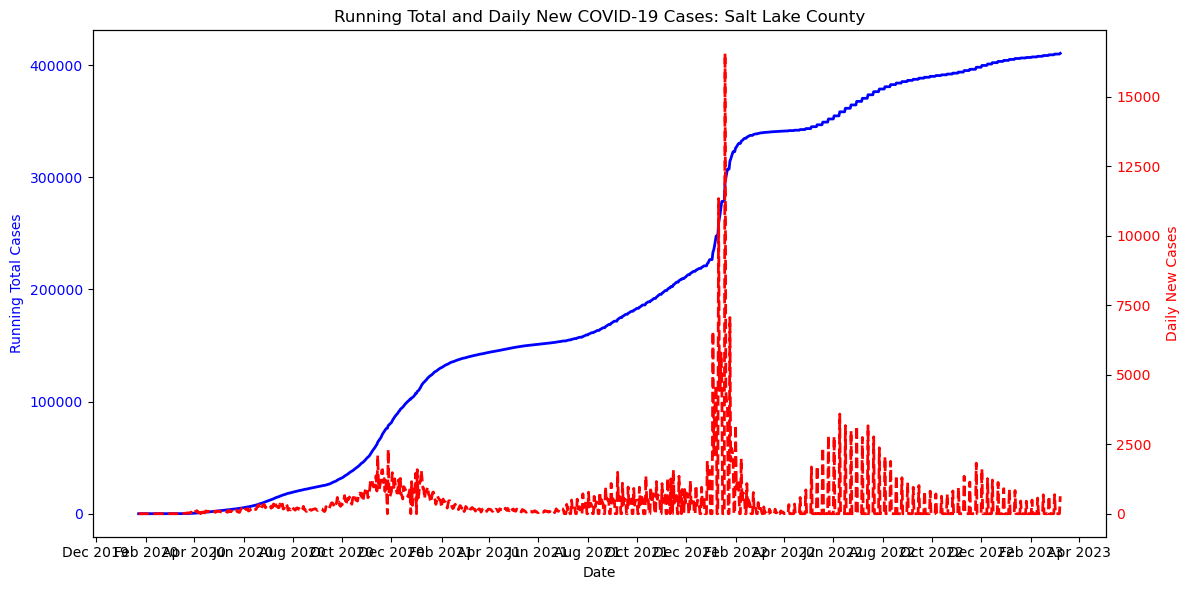

In [9]:
#QUESTION 3
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Filter data for a single county (e.g., Salt Lake in Utah)
county_name = 'Salt Lake'
utah_data = covid_df[covid_df['Province_State'] == 'Utah']
county_data = utah_data.set_index('Admin2').loc[county_name].iloc[10:]

# Convert columns to datetime
county_data.index = pd.to_datetime(county_data.index, errors='coerce')

# Calculate the daily new cases
daily_new_cases = county_data.diff().fillna(0)

# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the running total on the primary y-axis
ax1.plot(county_data.index, county_data.values, color='blue', label='Running Total Cases', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Running Total Cases', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Add the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(county_data.index, daily_new_cases.values, color='red', label='Daily New Cases', linestyle='--', linewidth=2)
ax2.set_ylabel('Daily New Cases', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Format the x-axis for dates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)

# Add title and legends
plt.title(f"Running Total and Daily New COVID-19 Cases: {county_name} County")
fig.tight_layout()
plt.show()


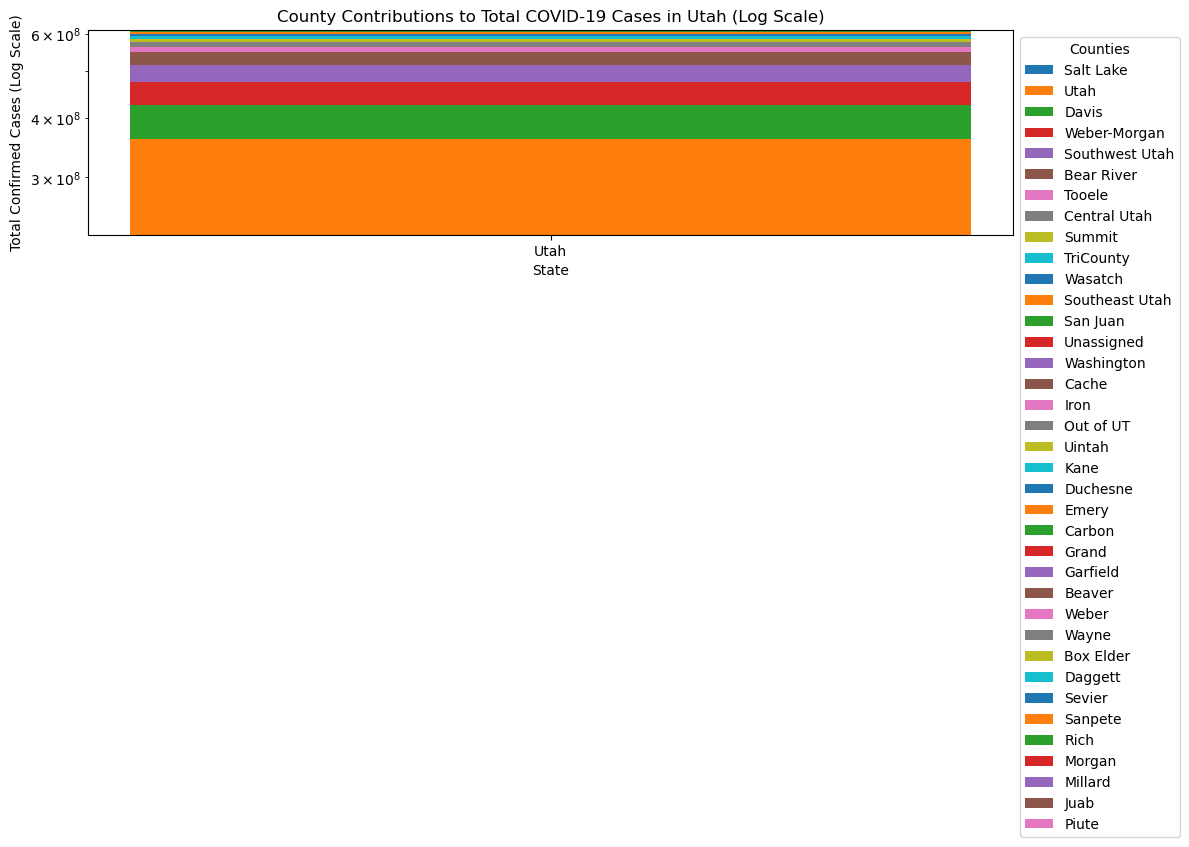

In [28]:
#QUESTION 4
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter

# Filter data for a specific state (e.g., Utah)
state_name = 'Utah'
state_data = covid_df[covid_df['Province_State'] == state_name]

# Aggregate total cases for each county
county_totals = state_data.set_index('Admin2').iloc[:, 11:].sum(axis=1)
county_totals = county_totals.sort_values(ascending=False)

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))

bottom = 0
for county, cases in county_totals.items():
    ax.bar(state_name, cases, bottom=bottom, label=county)
    bottom += cases

# Apply a logarithmic scale to the y-axis
ax.set_yscale('log')

# Format y-axis for better readability
def log_formatter(x, pos):
    if x == 0:
        return "0"
    return f'{int(x):,}'  # Display numbers with commas for readability

ax.yaxis.set_major_formatter(FuncFormatter(log_formatter))

# Add legend, labels, and title
ax.set_title(f"County Contributions to Total COVID-19 Cases in {state_name} (Log Scale)")
ax.set_ylabel('Total Confirmed Cases (Log Scale)')
ax.set_xlabel('State')
ax.legend(loc='upper left', title='Counties', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


